<a href="https://colab.research.google.com/github/jasonlee87/AIDL-Lab/blob/master/02_02_mnist_mlp_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf.keras 패키지를 이용해 MLP(Mingle Layer Perceptron) 설계하기

1. 이미지 분류(Image Classification)를 위한 뉴럴 네트워크(Neural Network)를 MLP로 설계한다.
2. NN 모델을 훈련시킨다.
3. NN 모델의 정확도를 검증한다.

## TensorFlow 2 패키지를 설치하고 관련 모듈들을 import 한다.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


## tf.keras.dataset의 mnist dataset을 다운받는다. 그리고 255.0으로 나눠 int를 float로 변환한다.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


## 실제 mnist dataset 모습 (총 60000개)

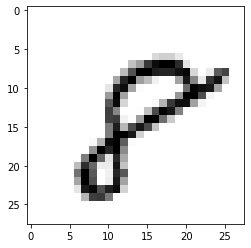

In [3]:
plt.imshow(x_train[59999], cmap='gray_r')
plt.show()

## tf.keras.Sequential 모델을 만든다.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

## 그리고 훈련에 사용할 optimizer와 loss 함수를 선택한다.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [6]:
history = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2330 - accuracy: 0.9293
Epoch 2/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1087 - accuracy: 0.9668
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0830 - accuracy: 0.9748
Epoch 4/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0667 - accuracy: 0.9795
Epoch 5/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0594 - accuracy: 0.9808


## 모델 구성 요약을 보는 2가지 방법

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
__________________________________________________

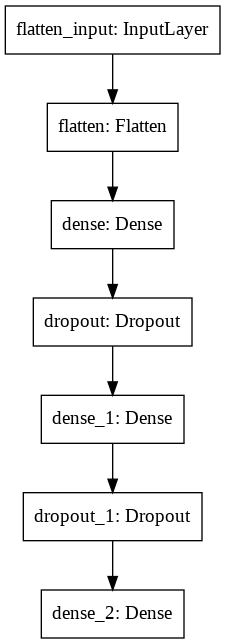

In [8]:
tf.keras.utils.plot_model(model) 
#tf.keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

## 모델 테스트

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 0.0374 - accuracy: 0.9791


[0.07381105396965867, 0.9791]

## MNIST 데이타셋중 테스트셋을 대상으로 한 MLP 이미지 분류기의 정확도는 97% 수준이다.

## Plot 그리기

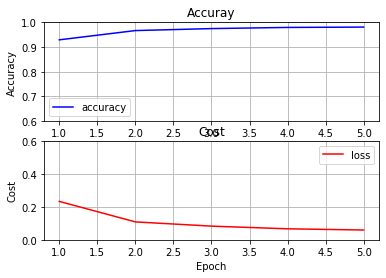

In [10]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
epochs = range(1, len(loss)+1)

plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='accuracy')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Cost')
plt.plot(epochs, history.history['loss'], 'r', label='loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.ylim([0.0, 0.6])
plt.legend(loc='best')
plt.show()


In [0]:
model.save('file_name.h5')

In [15]:
tf.saved_model.save(model, "path_to_folder_on_disk")

loaded_model = tf.saved_model.load("path_to_folder")

INFO:tensorflow:Assets written to: path_to_folder_on_disk/assets


In [16]:
loaded_model = tf.saved_model.load("path_to_folder")

OSError: ignored